# Underage overdoses
Teens can overdose on a single substance or multiple substances simultaneously. When mind-altering substances are combined, the effects of each substance can grow even more pronounced, making an overdose more likely. For example, if a teen abuses alcohol (a depressant) and also abuses Adderall (a stimulant) at the same time, they are subject to a wider variety of risks.

The data above is about drug overdoses between years 1995 and 2017.

Text(0.5, 1.0, 'Underage overdoses per year')

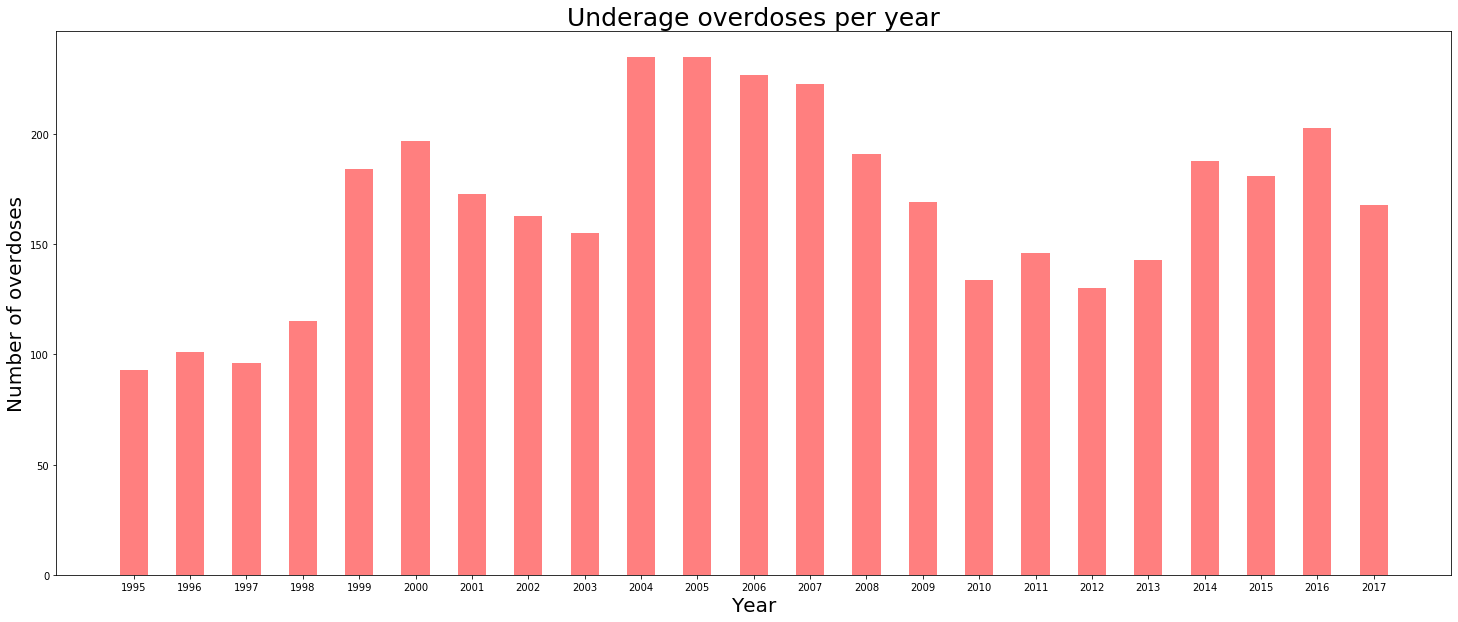

In [3]:
import pandas
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
f = pandas.read_excel("./tables/drugDeaths/deaths15-19.xlsx")
mrtvi=defaultdict(int)
for godina in range(2017,1994,-1):
    for i,j in f.iterrows():
        brojevi=np.sum(f[godina])
        mrtvi[godina]=brojevi
god=np.array([v for v in mrtvi.keys()])
br=np.array([v for v in mrtvi.values()])
plt.figure(figsize=(25,10))
plt.bar(god,br,align="center",width=0.5,alpha=0.5,color="red")
plt.xticks(god)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of overdoses",fontsize=20)
plt.title("Underage overdoses per year",fontsize=25)

Text(0.5, 1.0, 'Underage overdoses by countries')

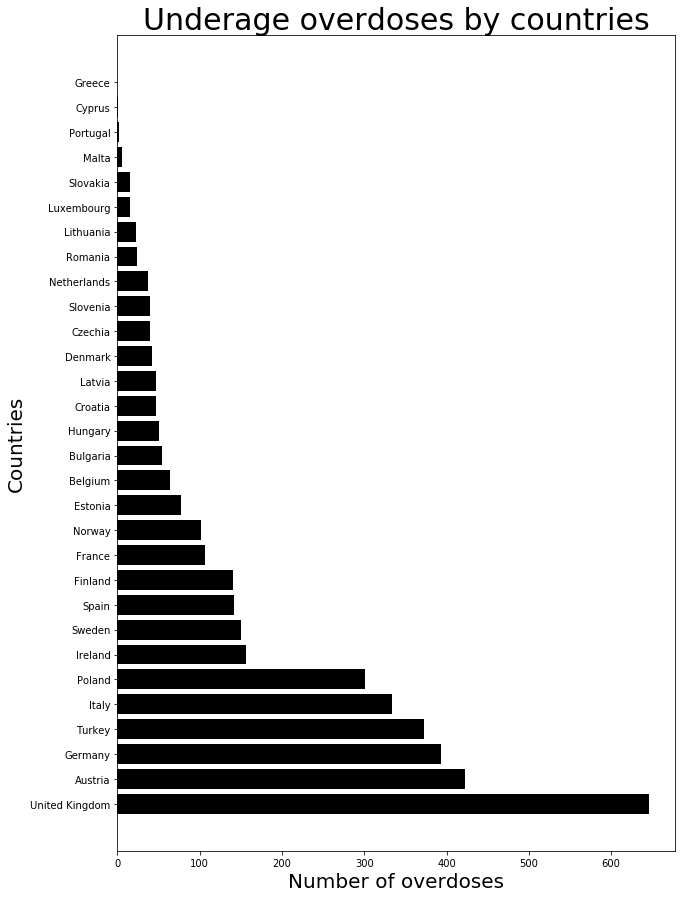

In [12]:
underage_zemlje={}
def replaceNan(data, indxs, val):
    for (i,v) in enumerate(indxs):
        if v == True:
            data[i] = val
for i,row in f.iterrows():
    if type(row["Country"]) is str:
        country = row["Country"].strip().replace("*", "").strip()
        underage_zemlje[country] = [row[col] for col in f.columns[:-1][1:]]
        nan_indx = np.isnan(underage_zemlje[country])
        replaceNan(underage_zemlje[country], nan_indx,0)
sortedzemlje = sorted(underage_zemlje, key = lambda k: sum(underage_zemlje[k]), reverse=True)
underage_deaths=[sum(underage_zemlje[i]) for i in sortedzemlje]
ypos=np.arange(len(sortedzemlje))
plt.figure(figsize=(10,15))
yt=np.array([v for v in sortedzemlje])
plt.yticks(ypos,yt)
plt.barh(ypos, underage_deaths, color="black")
plt.ylabel("Countries",fontsize=20)
plt.xlabel("Number of overdoses",fontsize=20)
plt.title("Underage overdoses by countries",fontsize=30)

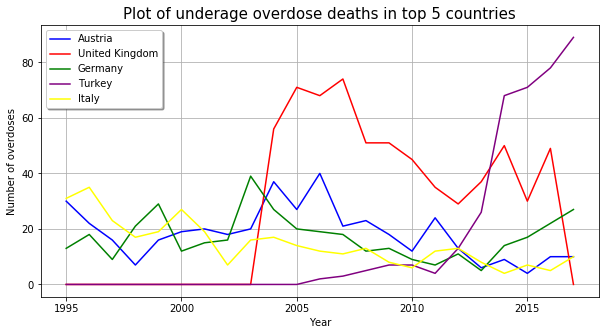

In [4]:
austria_underage=underage_zemlje["Austria"]
uk_underage=underage_zemlje["United Kingdom"]
germany_underage=underage_zemlje["Germany"]
turk_underage=underage_zemlje["Turkey"]
it_underage=underage_zemlje["Italy"]
godine=[i for i in range(2017,1994,-1)]
plt.figure(figsize=(10,5))
plt.plot(godine,austria_underage,color="blue",label="Austria")
plt.plot(godine,uk_underage,color="red",label="United Kingdom")
plt.plot(godine,germany_underage,color="green",label="Germany")
plt.plot(godine,turk_underage,color="purple",label="Turkey")
plt.plot(godine,it_underage,color="yellow",label="Italy")
plt.xlabel("Year",fontsize=10)
plt.ylabel("Number of overdoses",fontsize=10)
plt.title("Plot of underage overdose deaths in top 5 countries",fontsize=15)
plt.legend(loc="best",shadow=True)
plt.grid()